In [1]:
# Importing Necessary Modules
# md traj can be installed via conda easily.
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import os



In [2]:
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
original_3W5A = md.load('../3W5A_original/3W5A_original_strip_50.nc',top = '../3W5A_original/3W5A_original_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds = original_3W5A.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds = original_3W5A.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds = original_3W5A.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds = original_3W5A.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = original_3W5A.atom_slice(IM_domain_inds, inplace = False)
A_domain = original_3W5A.atom_slice(A_domain_inds, inplace = False)
P_domain = original_3W5A.atom_slice(P_domain_inds, inplace = False)
N_domain = original_3W5A.atom_slice(N_domain_inds, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
original_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)


In [5]:
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
human_3W5A = md.load('../3W5A_human/3W5A_human_strip_50.nc',top = '../3W5A_human/3W5A_human_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds = human_3W5A.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds = human_3W5A.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds = human_3W5A.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds = human_3W5A.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = human_3W5A.atom_slice(IM_domain_inds, inplace = False)
A_domain = human_3W5A.atom_slice(A_domain_inds, inplace = False)
P_domain = human_3W5A.atom_slice(P_domain_inds, inplace = False)
N_domain = human_3W5A.atom_slice(N_domain_inds, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
human_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)


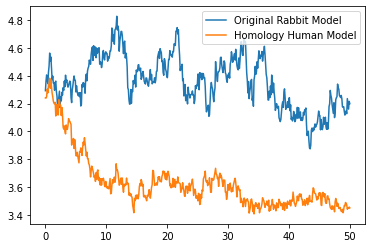

In [8]:
# Plot Results
plt.plot(np.linspace(0,50,500), original_A_N_dist, label = 'Original Rabbit Model')
plt.plot(np.linspace(0,50,500), human_A_N_dist, label = 'Homology Human Model')
plt.legend()

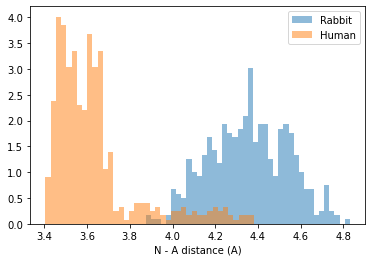

In [20]:
plt.hist(original_A_N_dist, bins = 40, alpha = 0.5, density = True, label = 'Rabbit')
plt.hist(human_A_N_dist, bins = 40, alpha = 0.5, density = True, label = 'Human')
plt.legend()
plt.xlabel('N - A distance (A)')
plt.show()


In [10]:
# Calculate the RMSF for the alpha carbon atoms
orig_rmsf = md.rmsf(original_3W5A, original_3W5A, frame = 0, atom_indices=original_3W5A.top.select('name CA'))
hum_rmsf = md.rmsf(human_3W5A,human_3W5A, atom_indices=human_3W5A.top.select('name CA'))


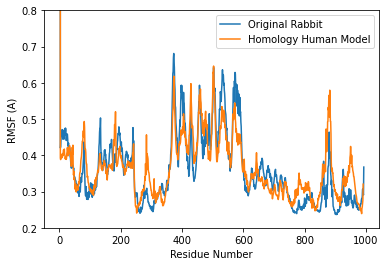

In [16]:
plt.plot(orig_rmsf, label = 'Original Rabbit')
plt.plot(hum_rmsf, label = 'Homology Human Model')
plt.legend()
plt.xlabel('Residue Number')
plt.ylim((0.2,0.8))
plt.ylabel('RMSF (A)')
plt.savefig('RMSF_comp.svg')

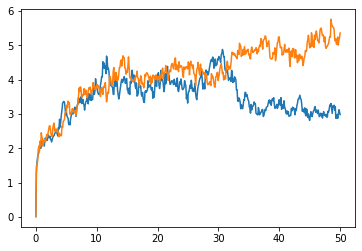

In [40]:
## RMSD Calculations

original_rmsd = md.rmsd(original_3W5A,
                     original_3W5A,
                     frame=0,
                     atom_indices=original_3W5A.top.select('protein'))


plt.plot(np.linspace(0,50,500), original_rmsd*10, label = 'Rabbit')

human_rmsd = md.rmsd(human_3W5A,
                     human_3W5A,
                     frame=0,
                     atom_indices=human_3W5A.top.select('protein'))


plt.plot(np.linspace(0,50,500), human_rmsd*10, label = 'Human')


